    Importing necessary libraries and loading the data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv(r'C:\Users\Victor Kithinzi\Downloads\Churn_Modelling.csv')

    Understanding the data

    # Number of rows and columns

In [6]:
print("The data has", data.shape[0], "rows and", data.shape[1], "columns")

The data has 10000 rows and 14 columns


    # Data types of each column

In [7]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


    # Missing values

In [8]:
print(data.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


    # Statistical summary of the data

In [9]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

    Cleaning the data

    # Removing irrelevant columns (e.g., RowNumber, CustomerId, and Surname)

In [10]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

    Exploring the target variable

    # Count of customers who churned (Exited=1) and who did not (Exited=0)

In [11]:
print(data['Exited'].value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


    # Bar plot of the target variable

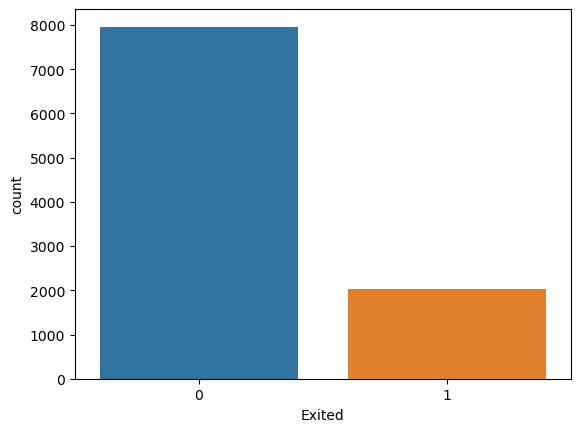

In [12]:
sns.countplot(x='Exited', data=data)
plt.show()

    Exploring relationships between features and the target variable

    # CreditScore vs. Exited

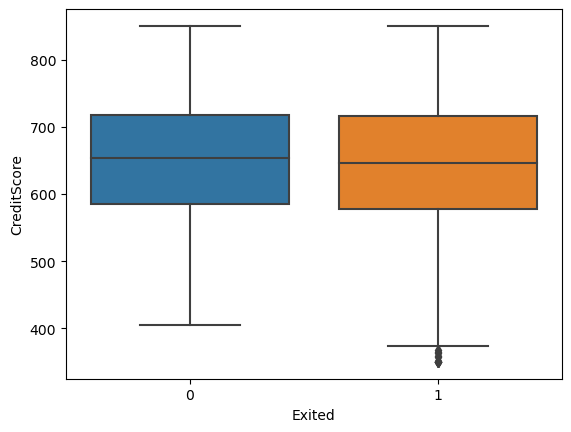

In [13]:
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.show()

    # Geography vs. Exited

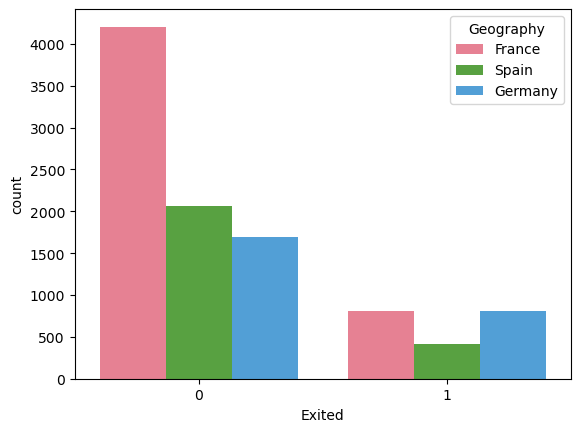

In [14]:
sns.countplot(x='Exited', hue='Geography', data=data, palette='husl')
plt.show()

    # Gender vs. Exited

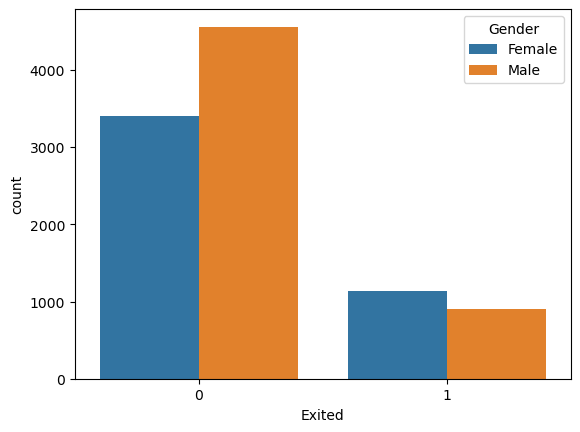

In [15]:
sns.countplot(x='Exited', hue='Gender', data=data)
plt.show()

    # Age vs. Exited

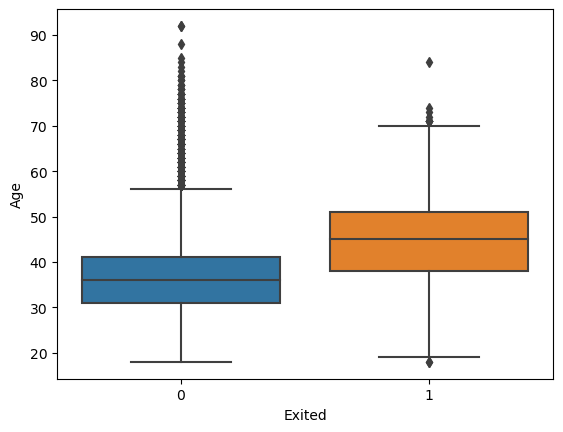

In [16]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.show()

    # Tenure vs. Exited

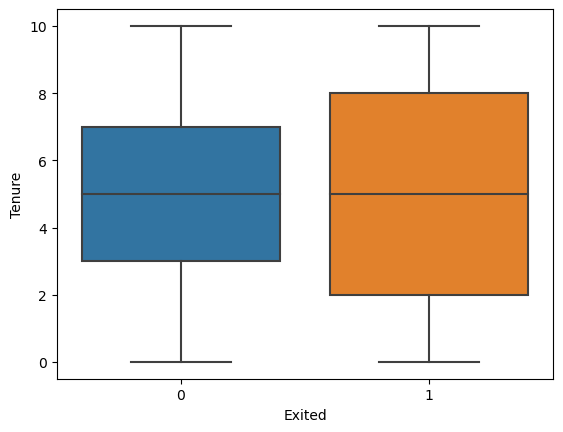

In [17]:
sns.boxplot(x='Exited', y='Tenure', data=data)
plt.show()

    # Balance vs. Exited

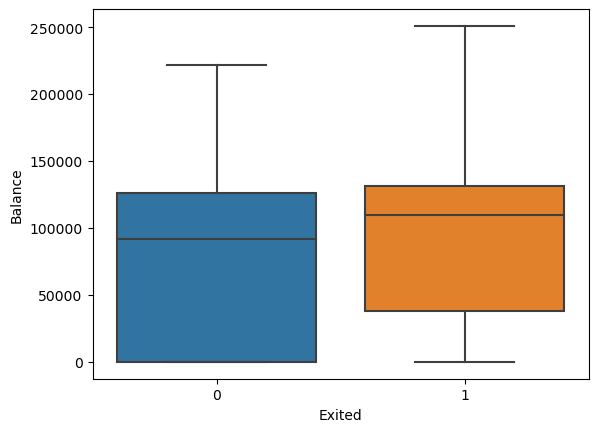

In [18]:
sns.boxplot(x='Exited', y='Balance', data=data)
plt.show()

    # NumOfProducts vs. Exited

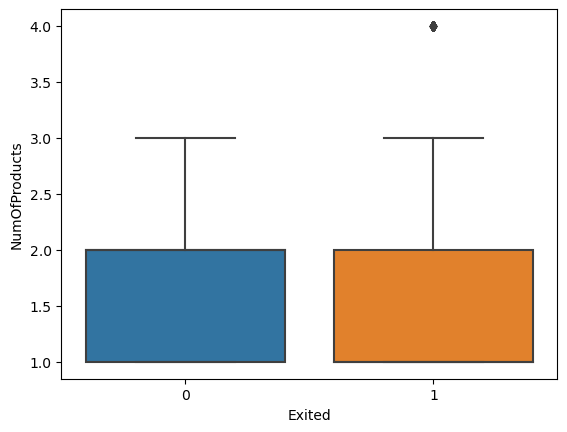

In [19]:
sns.boxplot(x='Exited', y='NumOfProducts', data=data)
plt.show()

    # HasCrCard vs. Exited

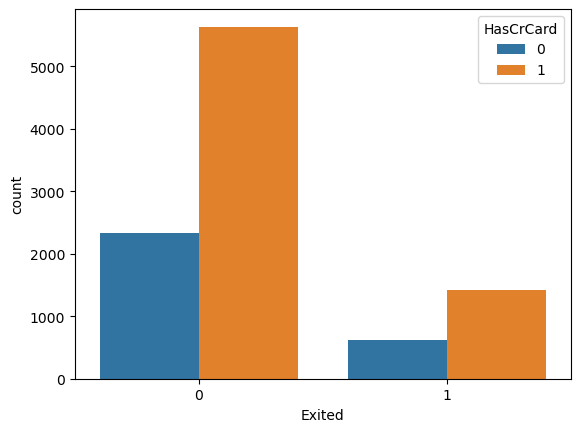

In [20]:
sns.countplot(x='Exited', hue='HasCrCard', data=data)
plt.show()

    # IsActiveMember vs. Exited

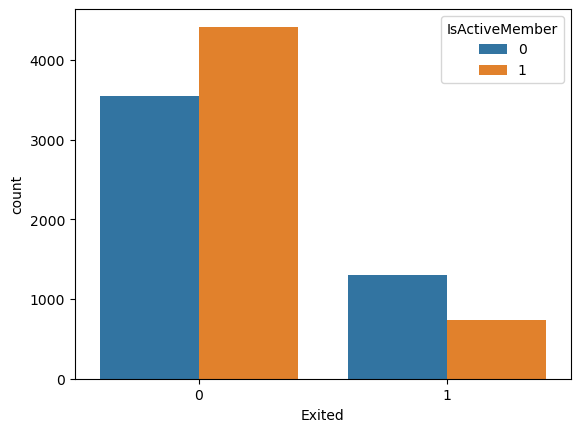

In [21]:
sns.countplot(x='Exited', hue='IsActiveMember', data=data)
plt.show()

    # EstimatedSalary vs. Exited

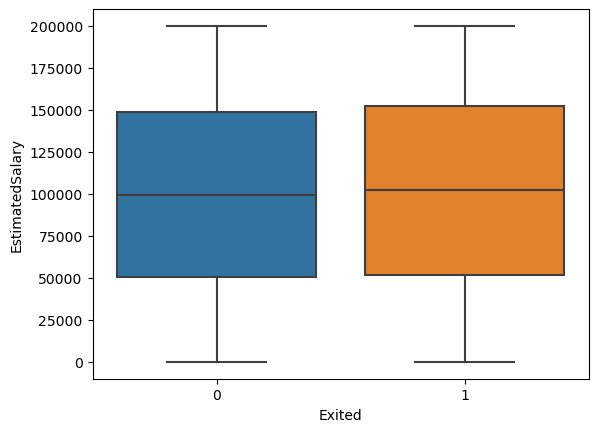

In [22]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.show()

    Concluding the EDA

    # Handling class imbalance

In [23]:
from sklearn.utils import resample

    # Separate majority and minority classes

In [24]:
data_majority = data[data.Exited==0]
data_minority = data[data.Exited==1]

    # Upsample minority class

In [25]:
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=123)

    # Combine upsampled minority class with majority class

In [26]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

    # New target variable distribution

In [27]:
print(data_upsampled.Exited.value_counts(normalize=True))

0    0.5
1    0.5
Name: Exited, dtype: float64


    # Removing highly correlated features

In [29]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Select columns with a correlation coefficient greater than 0.9

In [31]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

data_upsampled = data_upsampled.drop(data[to_drop], axis=1)

    # Feature transformations

    # Example: Log transformation of the "Balance" feature

In [32]:
data_upsampled["Balance"] = np.log1p(data_upsampled["Balance"])